## MILP Optimization 

In [1]:
# import Glop package
from ortools.linear_solver import pywraplp as glp
import lptools as lpt

In [2]:
#Create LP model object
mymodel = glp.Solver('MILP_temp', glp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

In [3]:
inf = mymodel.infinity()

            # name: (type 'c'=continuous or 'i'=integer, lower bound, upper bound, objective coefficient)
variables = {'PE': ('i', 0, 1, 90),
             'WE': ('i', 0, 1, 40),
             'NM': ('i', 0, 1, 10),
             'NP': ('i', 0, 1, 37)}

            # name: (lower bound, upper bound, coefficient list)
constraints = {'Y1': (-inf, 40, [15, 10, 10, 15]),
               'Y2': (-inf, 50, [20, 15, 0, 10]),
               'Y3': (-inf, 40, [20, 20, 0, 10]),
               'Y4': (-inf, 35, [15, 5, 4, 10])}

mymodel.Objective().SetMaximization()

In [4]:
for v in variables:
    (t,lb,ub,c) = variables[v]
    if t == 'c':
        var = mymodel.NumVar(lb,ub,v)
    elif t == 'i':
        var = mymodel.IntVar(lb,ub,v)
    else:
        print('Invalid variable type =', t)
    mymodel.Objective().SetCoefficient(var,c)

In [5]:
for c in constraints:
    (lb,ub,coeff_lst) = constraints[c]
    constr = mymodel.Constraint(lb,ub,c)
    for (v,coeff) in zip(mymodel.variables(),coeff_lst):
        constr.SetCoefficient(v,coeff)

In [6]:
lpt.print_model(mymodel)

Variables:
PE, WE, NM, NP 

maximize: 90.0*PE + 40.0*WE + 10.0*NM + 37.0*NP 

Subject To:
Y1: 15.0*PE + 10.0*WE + 10.0*NM + 15.0*NP <= 40.0
Y2: 20.0*PE + 15.0*WE + 10.0*NP <= 50.0
Y3: 20.0*PE + 20.0*WE + 10.0*NP <= 40.0
Y4: 15.0*PE + 5.0*WE + 4.0*NM + 10.0*NP <= 35.0

Bounds:
PE in [0, 1]
WE in [0, 1]
NM in [0, 1]
NP in [0, 1]


In [7]:
#solve model and display results
status = mymodel.Solve()
print('Solution Status =',status)
print('Optimal Value = %.2f' % mymodel.Objective().Value())
for v in mymodel.variables():
    print('%s = %.2f' % (v.name(),v.solution_value()))

Solution Status = 0
Optimal Value = 140.00
PE = 1.00
WE = 1.00
NM = 1.00
NP = 0.00


In [8]:
# display variable information
print('Variable    LB   Value    UB')
for v in mymodel.variables():
    print('%8s  %5.1f  %5.1f  %5.1f' % (v.name(),v.lb(),v.solution_value(),v.ub()))

Variable    LB   Value    UB
      PE    0.0    1.0    1.0
      WE    0.0    1.0    1.0
      NM    0.0    1.0    1.0
      NP    0.0    0.0    1.0


In [9]:
#display constraint information
print('Constraint    LB    Value  UB')
for (c,lhs) in zip(mymodel.constraints(),mymodel.ComputeConstraintActivities()):
    print('%10s  %5.1f  %5.1f  %5.1f' % (c.name(),c.lb(),lhs,c.ub()))

Constraint    LB    Value  UB
        Y1   -inf   35.0   40.0
        Y2   -inf   35.0   50.0
        Y3   -inf   40.0   40.0
        Y4   -inf   24.0   35.0


### Sensitivity Analysis

In [10]:
import matplotlib.pyplot as plt

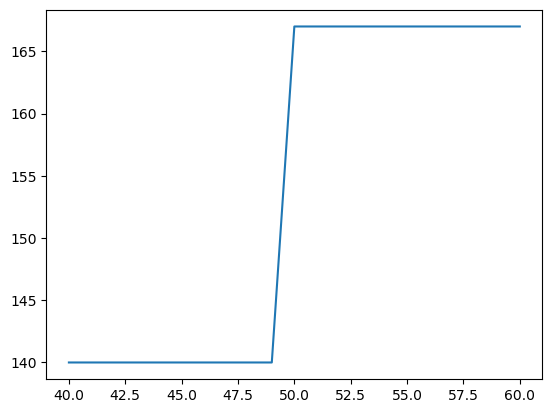

In [11]:
# Optimization parameter analysis : Year 3 Budget from 40 to 60

param_lst = list(range(40,61))
optval_lst = list()
for b in param_lst:
    mymodel.constraints()[2].SetUb(b)
    mymodel.Solve()
    optval_lst.append(mymodel.Objective().Value())
mymodel.constraints()[2].SetUb(40)

plt.plot(param_lst, optval_lst)